A Maria Benz produz carros de passeio para o mercado local e para exportação para vários países. O primeiro estágio do processo de produção é fabricar os monoblocos, que são então disponibilizados para a linha de produção para montagem de outras peças. A Maria Benz quer programar a produção para os próximos três meses. As demandas estimadas, a capacidade de produção e o custo unitário de produção para cada um dos meses em questão são ilustrados na tabela a seguir.

Tabela de dados
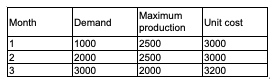


Devido a variações na capacidade de produção e no custo de fabricação entre meses, a empresa pode produzir alguns monoblocos um mês ou mais antes de serem programados. A desvantagem é que tais monoblocos precisam ser armazenados até o mês em que serão consumidos, a um custo unitário de armazenamento de $ 200,00/mês. O gerente de produção quer saber quantos monoblocos devem ser produzidos a cada mês para atender à demanda com o menor custo possível de produção e armazenamento. Modele esse problema como um problema de transporte e resolva-o usando o Solver.

Objetivo
Exemplo simples de aplicação de pesquisa operacional. O objetivo do problema é minimizar o custo de produção.

Intalar a biblioteca Optimization with PuLP

In [1]:
%pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pulp import *

Vamos definir o Problema

In [3]:
problema1 = LpProblem('Producao_Monobloco', LpMinimize)

Definir as variáveis do problema

In [4]:
x11 = LpVariable('x11',lowBound = 0)
x12 = LpVariable('x12',lowBound = 0)
x13 = LpVariable('x13',lowBound = 0)
x22 = LpVariable('x22',lowBound = 0)
x23 = LpVariable('x23',lowBound = 0)
x33 = LpVariable('x33',lowBound = 0)

Quantos monoblocos serão produzidos a cada mês?

Definir a função objetivo, está relacionado ao custo definido incialmente

In [5]:
problema1 += 3000*x11 + 3200*x12 + 3400*x13 + 3000*x22 + 3200*x23 + 3200*x33

Definir as restrições

In [6]:
problema1 += x11 + x12 + x13 <= 2500
problema1 += x22 + x23 <= 2500
problema1 += x33 <= 2000
problema1 += x11 == 1000
problema1 += x12 + x22 == 2000
problema1 += x13 + x23 + x33 == 3000


In [7]:
problema1

Producao_Monobloco:
MINIMIZE
3000*x11 + 3200*x12 + 3400*x13 + 3000*x22 + 3200*x23 + 3200*x33 + 0
SUBJECT TO
_C1: x11 + x12 + x13 <= 2500

_C2: x22 + x23 <= 2500

_C3: x33 <= 2000

_C4: x11 = 1000

_C5: x12 + x22 = 2000

_C6: x13 + x23 + x33 = 3000

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x22 Continuous
x23 Continuous
x33 Continuous

In [8]:
problema1.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.asdf/installs/python/3.12.7/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/ee9774b436a0421cb21aeae207118b20-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/ee9774b436a0421cb21aeae207118b20-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 30 RHS
At line 37 BOUNDS
At line 38 ENDATA
Problem MODEL has 6 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-3) rows, 4 (-2) columns and 7 (-5) elements
0  Obj 9000000 Primal inf 3000 (1)
3  Obj 18700000
Optimal - objective value 18700000
After Postsolve, objective 18700000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 18700000 - 3 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00 

1

In [9]:
for v in problema1.variables():
    print(v.name, "=", v.varValue)

x11 = 1000.0
x12 = 500.0
x13 = 0.0
x22 = 1500.0
x23 = 1000.0
x33 = 2000.0


In [10]:
print('custo total = '), value(problema1.objective)

custo total = 


(None, 18700000.0)